In [31]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import heapq, numpy as np

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
documents = []
dir_path = "awards_2002/"
root_dir = os.fsencode(dir_path)
for directory in os.listdir(root_dir):
    sub_directory = os.fsdecode(directory)
    current_path = dir_path + sub_directory + "/"
    
    for file in os.listdir(dir_path + sub_directory):
        with open(current_path + file, "r", encoding="utf-8", errors="ignore") as f:
            documents.append(f.read())

## Functions

In [15]:
def feature_names(vectorizer, matrix):
    features = tfidf_vectorizer.get_feature_names()
    for doc_i in range(5):
        print("\nDocument %d, top terms by TF-IDF" % doc_i)
        for term, score in sorted(list(zip(features,matrix.toarray()[doc_i])), key=lambda x:-x[1])[:5]:
            print("%.2f\t%s" % (score, term))

In [34]:
def print_clusters(matrix, clusters, n_keywords=10):
    max_cluster = 10
    for cluster in range(min(clusters), max_cluster):
        cluster_docs = [i for i, c in enumerate(clusters) if c == cluster]
        print("Cluster: %d (%d docs)" % (cluster, len(cluster_docs)))
        
        # Keep scores for top n terms
        new_matrix = np.zeros((len(cluster_docs), matrix.shape[1]))
        for cluster_i, doc_vec in enumerate(matrix[cluster_docs].toarray()):
            for idx, score in heapq.nlargest(n_keywords, enumerate(doc_vec), key=lambda x:x[1]):
                new_matrix[cluster_i][idx] = score

        # Aggregate scores for kept top terms
        keywords = heapq.nlargest(n_keywords, zip(new_matrix.sum(axis=0), features))
        print(', '.join([w for s,w in keywords]))
        print()

In [35]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, use_idf=True, sublinear_tf=True, max_df=0.1, max_features=100000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
matrix_sample = tfidf_matrix[:1000]
km = KMeans(n_clusters=30, random_state=123, verbose=0)
km.fit(matrix_sample)
print_clusters(matrix_sample, km.labels_)
# too many numbers in the clusters

Cluster: 0 (13 docs)
oceanographic, instrumentation, vessel, shipboard, ship, ships, equipment, transceivers, weatherbird, retrieval

Cluster: 1 (17 docs)
irvine, random, superfluid, insulator, anderson, 3he, aerogel, valuations, rsvp, localization

Cluster: 2 (36 docs)
teacher, teachers, 7688, alliance, mathematics, standards, ate, sme, professoriate, middle

Cluster: 3 (20 docs)
operators, operator, spaces, holomorphic, toeplitz, harmonic, vector, bellman, banach, integrals

Cluster: 4 (18 docs)
functions, numbers, linear, galois, finite, zeta, generalized, rutgers, mixed, random

Cluster: 5 (32 docs)
fellowship, 9219, 108000, dms, lloyd, 1260, postdoctoral, stanford, hyde, setauket

Cluster: 6 (37 docs)
manifolds, curvature, geometry, conformal, ergodic, riemannian, einstein, topology, geometric, metrics

Cluster: 7 (38 docs)
struct, seismic, japan, straightening, sensor, repair, wind, liquefaction, laminar, resistivity

Cluster: 8 (49 docs)
algebraic, algebra, algebras, representat

In [36]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, use_idf=True,max_df=0.1, max_features=100000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
matrix_sample = tfidf_matrix[:1000]
km = KMeans(n_clusters=30, random_state=123)
km.fit(matrix_sample)
print_clusters(matrix_sample, km.labels_)
# too many numbers in the clusters

Cluster: 0 (36 docs)
magnetic, spin, superconductors, superconducting, superfluid, superconductivity, matter, films, nano, condensed

Cluster: 1 (25 docs)
algebraic, combinatorics, problem, varieties, curves, representation, symmetric, galois, conformal, conjectures

Cluster: 2 (25 docs)
ship, oceanographic, operations, oce, 5411, goad, instrumentation, equipment, shipboard, vessel

Cluster: 3 (32 docs)
fellowship, dms, 9219, 108000, lloyd, 1260, postdoctoral, stanford, princeton, hyde

Cluster: 4 (23 docs)
fellowship, microbial, dbi, informatics, fungal, postdoctoral, bacterial, fungi, aeruginosa, host

Cluster: 5 (31 docs)
sdp, linear, regression, programming, parallel, algorithms, integer, optimization, semidefinite, preconditioning

Cluster: 6 (20 docs)
algebras, representation, lie, quantum, subfactors, symmetries, neumann, representations, von, algebra

Cluster: 7 (24 docs)
industry, colleges, technical, ate, center, pulp, curriculum, regional, technicians, paper

Cluster: 8 (133

Cluster: 1 (5 docs)
sediment, floodplain, fly, strickland, clinoform, mg, river, seawater, trapping, carbonate

Cluster: 2 (3 docs)
plate, rica, costa, cocos, flow, catherine, heat, constable, subducted, flux

Cluster: 3 (10 docs)
subduction, mantle, gulf, clay, continental, mineralogy, factory, tectonically, arc, frictional

Cluster: 4 (3 docs)
cad, platform, platforms, 3d, parameterization, chips, desktop, drafting, power, parametric

Cluster: 5 (6 docs)
composite, capacitor, geotechnical, retrofit, diagnostic, soil, fc, fiber, dove, integral

Cluster: 6 (5 docs)
gravitational, neutron, envelope, ligo, taam, wave, acns, star, stars, sound

Cluster: 7 (2 docs)
disk, flexible, analyte, interferometry, analytes, adaptive, laser, optimal, biosensors, pao

Cluster: 8 (2 docs)
rsvp, irvine, meco, error, observation, diffusion, muon, parameter, principle, zheng

Cluster: 9 (27 docs)
magnetosphere, magnetic, solar, coronal, lake, climate, aerosol, atm, cmes, inner



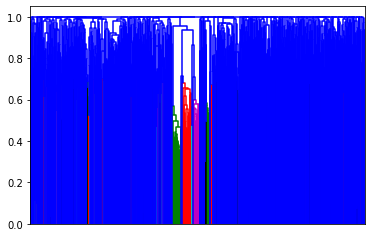

In [37]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, use_idf=True,max_df=0.1, max_features=100000)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
matrix_sample = tfidf_matrix[:1000]
z = linkage(matrix_sample.todense(), metric="cosine", method="complete")
clusters = fcluster(z, 0.99, criterion="distance")
print_clusters(matrix_sample, clusters)
# seems a lot better